# The lapidarist problem

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Data Loading
df = pd.read_csv("diamonds_data.csv")

In [4]:
#Variable types
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
#Null Values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
#Data Frame
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53930.000000,53930,53930,53930,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21546,11288,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797976,NaN,NaN,NaN,61.749325,57.457328,3933.054942,5.731236,5.734601,3.538776
std,0.474035,NaN,NaN,NaN,1.432711,2.234578,3989.628569,1.121807,1.142184,0.705729
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000


In [8]:
df.shape

(53930, 10)

In [9]:
#One Hot Encoding for categorical variables
cut_dummies = pd.get_dummies(df.cut)
df=pd.concat([df, cut_dummies], axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,Fair,Good,Ideal,Premium,Very Good
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53925,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,0,0
53926,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,0,0
53927,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,0,1
53928,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0


In [10]:
#One Hot Encoding for categorical variables
color_dummies = pd.get_dummies(df.color)
df=pd.concat([df, color_dummies], axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,...,Ideal,Premium,Very Good,D,E,F,G,H,I,J
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,1,0,0,0,1,0,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,1,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,1,0,0,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,0,1,0,0,0,0,0,0,1,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53925,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,...,1,0,0,1,0,0,0,0,0,0
53926,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,...,0,0,0,1,0,0,0,0,0,0
53927,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,...,0,0,1,1,0,0,0,0,0,0
53928,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,...,0,1,0,0,0,0,0,1,0,0


In [11]:
#One Hot Encoding for categorical variables
clarity_dummies = pd.get_dummies(df.clarity)
df=pd.concat([df, clarity_dummies], axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,1,0,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53925,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,...,0,0,0,0,1,0,0,0,0,0
53926,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,...,0,0,0,0,1,0,0,0,0,0
53927,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,...,0,0,0,0,1,0,0,0,0,0
53928,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,...,0,0,0,0,0,1,0,0,0,0


In [12]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'Fair', 'Good', 'Ideal', 'Premium', 'Very Good', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1',
       'VVS2'],
      dtype='object')

In [13]:
#Sorting columns for modelling
df = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'Fair', 'Good', 'Ideal', 'Premium', 'Very Good', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1',
       'VVS2','price']]
df.drop(['cut','color','clarity'], axis=1, inplace=True)
df

/Users/oscaraguilar/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,carat,depth,table,x,y,z,Fair,Good,Ideal,Premium,...,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,price
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,1,0,0,0,0,326
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,1,0,0,0,0,0,326
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,1,0,0,0,327
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,0,0,0,0,0,0,1,0,0,334
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,1,0,0,0,1,0,0,0,0,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53925,0.72,60.8,57.0,5.75,5.76,3.50,0,0,1,0,...,0,0,0,1,0,0,0,0,0,2757
53926,0.72,63.1,55.0,5.69,5.75,3.61,0,1,0,0,...,0,0,0,1,0,0,0,0,0,2757
53927,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2757
53928,0.86,61.0,58.0,6.15,6.12,3.74,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2757


In [14]:
#Final training set
train=df

In [15]:
train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'Fair', 'Good', 'Ideal',
       'Premium', 'Very Good', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'I1', 'IF',
       'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'price'],
      dtype='object')

In [16]:
#Unkown prices
test_data = {'carat': [0.71, 0.83, 0.5, 0.39, 0.32, 0.9, 0.51, 1.12, 0.4, 0.36],\
            'cut': ['Good', 'Ideal', 'Ideal', 'Premium', 'Premium', 'Good', 'Ideal', 'Ideal', 'Ideal', 'Premium'],\
            'color': ['I','G','E','J','G','F','D','G','G','I'],\
            'clarity': ['VVS2','VS1','VS2','VS1','VS1','SI2','VS1','VVS2','VVS2','VS2'],\
            'depth': [63.1,62.1,61.5,61.6,62.1,63.3,60.9,62.1,62.4,62.7],\
            'table': [58,55,55,59,56,57,57,54.8,56,59],\
            'x': [5.64,6.02,5.11,4.67,4.43,6.08,5.2,6.64,4.72,4.54],\
            'y': [5.71,6.05,5.16,4.71,4.4,6.14,5.17,6.66,4.74,4.58],\
            'z': [3.58,3.75,3.16,2.89,2.74,3.87,3.16,4.13,2.95,2.86] }
test = pd.DataFrame(test_data)
test

,carat,cut,color,clarity,depth,table,x,y,z
0,0.71,Good,I,VVS2,63.1,58.0,5.64,5.71,3.58
1,0.83,Ideal,G,VS1,62.1,55.0,6.02,6.05,3.75
2,0.50,Ideal,E,VS2,61.5,55.0,5.11,5.16,3.16
3,0.39,Premium,J,VS1,61.6,59.0,4.67,4.71,2.89
4,0.32,Premium,G,VS1,62.1,56.0,4.43,4.40,2.74
5,0.90,Good,F,SI2,63.3,57.0,6.08,6.14,3.87
6,0.51,Ideal,D,VS1,60.9,57.0,5.20,5.17,3.16
7,1.12,Ideal,G,VVS2,62.1,54.8,6.64,6.66,4.13
8,0.40,Ideal,G,VVS2,62.4,56.0,4.72,4.74,2.95
9,0.36,Premium,I,VS2,62.7,59.0,4.54,4.58,2.86


In [17]:
#One Hot Encoding for categorical variables
cut_dummies2 = pd.get_dummies(test.cut)
color_dummies2 = pd.get_dummies(test.color)
clarity_dummies2 = pd.get_dummies(test.clarity)

test=pd.concat([test, cut_dummies2, color_dummies2, clarity_dummies2], axis=1)
test.drop(['cut','color','clarity'], axis=1, inplace=True)
test.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'Good', 'Ideal', 'Premium',
       'D', 'E', 'F', 'G', 'I', 'J', 'SI2', 'VS1', 'VS2', 'VVS2'],
      dtype='object')

In [18]:
test.shape

(10, 19)

In [19]:
#Adding columns that are not included in the test set, but they are in the train set
test['Fair'] = 0
test['Very Good'] = 0
test['H'] = 0
test['I1'] = 0
test['IF'] = 0
test['SI1'] = 0
test['VVS1'] = 0

In [20]:
test

,carat,depth,table,x,y,z,Good,Ideal,Premium,D,...,VS1,VS2,VVS2,Fair,Very Good,H,I1,IF,SI1,VVS1
0,0.71,63.1,58.0,5.64,5.71,3.58,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.83,62.1,55.0,6.02,6.05,3.75,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.50,61.5,55.0,5.11,5.16,3.16,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.39,61.6,59.0,4.67,4.71,2.89,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0.32,62.1,56.0,4.43,4.40,2.74,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,0.90,63.3,57.0,6.08,6.14,3.87,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.51,60.9,57.0,5.20,5.17,3.16,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
7,1.12,62.1,54.8,6.64,6.66,4.13,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0.40,62.4,56.0,4.72,4.74,2.95,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0.36,62.7,59.0,4.54,4.58,2.86,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [21]:
#Sorting columns for future modelling
test = test[['carat','depth', 'table', 'x', 'y',
       'z', 'Fair', 'Good', 'Ideal', 'Premium', 'Very Good', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1',
       'VVS2']]
test

,carat,depth,table,x,y,z,Fair,Good,Ideal,Premium,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.71,63.1,58.0,5.64,5.71,3.58,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.83,62.1,55.0,6.02,6.05,3.75,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0.50,61.5,55.0,5.11,5.16,3.16,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.39,61.6,59.0,4.67,4.71,2.89,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,0.32,62.1,56.0,4.43,4.40,2.74,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,0.90,63.3,57.0,6.08,6.14,3.87,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0.51,60.9,57.0,5.20,5.17,3.16,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7,1.12,62.1,54.8,6.64,6.66,4.13,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,0.40,62.4,56.0,4.72,4.74,2.95,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,0.36,62.7,59.0,4.54,4.58,2.86,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


# Multiple linear regression (MLR) 1st Model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

xval = train.values[:,0:-1]
yval = train.values[:,-1]
x = np.asanyarray(xval)
y = np.asanyarray(yval)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

predictions_mlr = regr.predict(X_test)
print("Residual sum of squares: %.2f" % np.mean((predictions_mlr - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print("Explained variance: %.2f" %explained_variance_score(y_test, predictions_mlr, multioutput='uniform_average'))
print("r^2: %.2f" % r2_score(y_test, predictions_mlr))

Coefficients:  [ 1.11932619e+04 -6.67472089e+01 -2.49512891e+01 -9.77853646e+02
 -2.21752456e+00 -3.14376588e+01 -5.59442601e+02  1.44988724e-01
  2.49940122e+02  1.77816495e+02  1.31540996e+02  8.53077436e+02
  6.11438078e+02  5.48774814e+02  3.46724465e+02 -1.41480947e+02
 -6.51143573e+02 -1.56739027e+03 -3.82306373e+03  1.55789013e+03
 -1.50671264e+02 -1.11971441e+03  7.58658528e+02  4.53557625e+02
  1.19570676e+03  1.12763635e+03]
Residual sum of squares: 1251039.33
Explained variance: 0.92
r^2: 0.92


In [23]:
estimated_prices = regr.predict(test.values)

In [24]:
estimated_prices

array([2853.01493597, 4838.8100408 , 2055.0632787 , -788.78482612,
        623.36979816, 3503.57811145, 2615.85290253, 7839.25581882,
       1648.9746174 , -458.50643383])

# Support Vector Regression (SVR) 2nd Model

In [25]:
from sklearn import svm
sup_vm = svm.SVR(kernel='linear')
sup_vm.fit(X_train, y_train)
svm_preds= sup_vm.predict(X_test)

In [41]:
print("Residual sum of squares: %.2f" % np.mean((svm_preds - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print("Explained variance: %.2f" % explained_variance_score(y_test, svm_preds, multioutput='uniform_average'))
print("r^2: %.2f" % r2_score(y_test, svm_preds))

Residual sum of squares: 3237845.68
Explained variance: 0.81
r^2: 0.80


In [29]:
sup_vm.predict(test.values)

array([3260.43624142, 4524.8630623 , 2161.63215247,  512.2236556 ,
        527.65739939, 3605.21981751, 2345.57011504, 6465.56872938,
       1470.73959919,  444.87642179])

# Decision Tree Regressor (DTR) 3rd Model

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)
dtr_preds= sup_vm.predict(X_test)

In [42]:
print("Residual sum of squares: %.2f" % np.mean((dtr_preds - y_test) ** 2))
# Explained variance score: 1 is perfect prediction

print("Explained variance: %.2f" % explained_variance_score(y_test, dtr_preds, multioutput='uniform_average'))
print("r^2: %.2f" % r2_score(y_test, dtr_preds))

Residual sum of squares: 3237845.68
Explained variance: 0.81
r^2: 0.80


In [33]:
dtr.predict(test.values)

array([2428., 4181., 1624.,  616.,  828., 3267., 2550., 9333.,  917.,
        491.])

# Results visualization

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 <a list of 7 Text major ticklabel objects>)

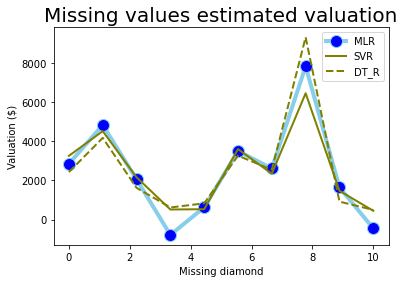

In [46]:
lin=np.linspace(0,len(estimated_prices), len(estimated_prices))
plt.plot( lin, regr.predict(test.values), marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,  label="MLR")
plt.plot( lin, sup_vm.predict(test.values), marker='', color='olive', linewidth=2,  label="SVR")
plt.plot( lin, dtr.predict(test.values), marker='', color='olive', linewidth=2, linestyle='dashed', label="DT_R")
plt.legend()
plt.title("Missing values estimated valuation", fontsize=20)
plt.xlabel("Missing diamond",fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel("Valuation ($)",fontsize=10)
plt.yticks(fontsize=10)    


#### Out of the 3 models, multiplie linear regression showed better performance. Therefore, that's the model that should be used to value the missing diamonds.